In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator




In [2]:
tf.__version__

'2.10.0'

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [4]:
!pip install SciPy





In [5]:
#Data augmentation 

In [6]:
#we pre process by resizing and rescaling

In [7]:
batch_size=12

training_datagenarator= ImageDataGenerator(rescale=1./255,horizontal_flip=True,
    vertical_flip=True,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2,validation_split=0.1)

In [8]:
#dividing the data into training and validation

In [9]:
 train=training_datagenarator.flow_from_directory(r"C:\Users\prodi\Desktop\Ml datasets\archive\Training Data",
                                                target_size=(224, 224),color_mode='rgb',
                                       class_mode='binary', batch_size=batch_size,subset='training')

validation=training_datagenarator.flow_from_directory(r"C:\Users\prodi\Desktop\Ml datasets\archive\Training Data",
                                                target_size=(224, 224),color_mode='rgb',
                                       class_mode='binary', batch_size=batch_size,subset='validation')

Found 12360 images belonging to 2 classes.
Found 1373 images belonging to 2 classes.


In [10]:
#making of cnn architecture

In [11]:
# Initializing CNN
cnn=tf.keras.models.Sequential()

# adding first layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding second layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding third layer
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

# Fully connected layer
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

# Output layers
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 256)       147712    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 256)      0

In [13]:
#training our cnn model

In [14]:
checkpoint=tf.keras.callbacks.ModelCheckpoint(r"C:\Users\prodi\Desktop\Ml datasets\archive\fire_smoke_model.h5",
                                             monitor='val_loss',mode="min",
                                             save_best_only=True)
callbacks=[checkpoint]

In [15]:
cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
cnn.fit(train,validation_data=validation,epochs=1,
                  steps_per_epoch=train.samples//batch_size,
                  validation_steps=validation.samples//batch_size,
                  callbacks=callbacks 
                 )




1030/1030 [==============================] - 180s 167ms/step - loss: 0.0899 - accuracy: 0.9753 - val_loss: 0.0243 - val_accuracy: 0.9876


In [16]:
#testing the model


In [17]:
from tensorflow.keras.models import load_model
cnn=load_model(r"C:\Users\prodi\Desktop\Ml datasets\archive\fire_smoke_model.h5")


In [18]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 256)       147712    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 256)      0

In [19]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [20]:
#image_for_testing=r'C:\Users\prodi\Desktop\Ml datasets\archive\Training Data\train_fire\1.png'
#image_for_testing=r'C:\Users\prodi\Desktop\Ml datasets\archive\test_small\smoke13.png'
image_for_testing=r'C:\Users\prodi\Desktop\Ml datasets\archive\test_big\000100.jpg'

1/1 [==============================] - 0s 439ms/step


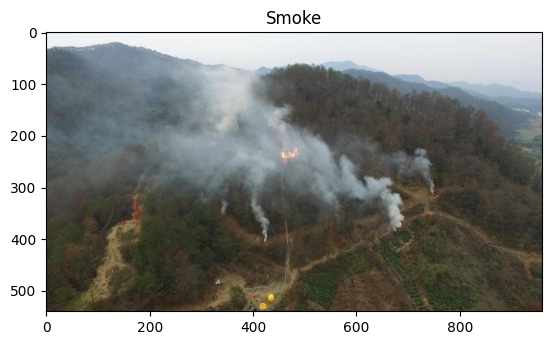

In [21]:
test_image=image.load_img(image_for_testing,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)

Catagories=['Smoke','fire']

image_show=PIL.Image.open(image_for_testing)
plt.imshow(image_show)

plt.title(Catagories[int(result[0][0])])
plt.show()